<h1>Data pemrosesan data</h1>
<hr>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data= tf.keras.utils.im

Melihat ukuran dan nama kelas 

In [2]:
data = tf.keras.utils.image_dataset_from_directory('BananaLSD\AugmentedSet')
# Get the class names
class_names = data.class_names
# Print the class names
print(class_names)
len(data)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\user\AppData\Local\Temp\ipykernel_10704\827513544.py:1: SyntaxWarning: invalid escape sequence '\A'
  data = tf.keras.utils.image_dataset_from_directory('BananaLSD\AugmentedSet')


Found 1600 files belonging to 4 classes.
['cordana', 'healthy', 'pestalotiopsis', 'sigatoka']


50

In [3]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

* 32: memproses 32 gambar dalam satu batch.

* 256, 256: setiap gambar memiliki tinggi dan lebar 256 piksel.

* 3: Angka 3 umumnya menunjukkan gambar berwarna (RGB: Red, Green, Blue).

<hr>
Ambil simple acak

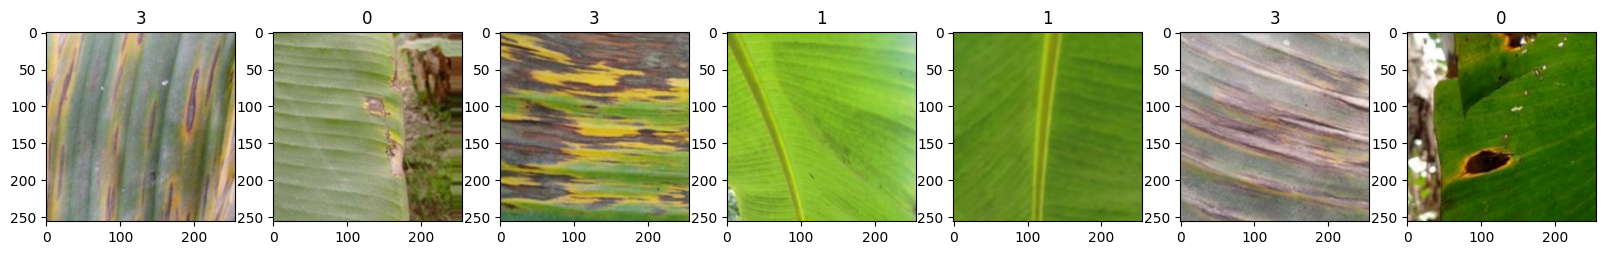

In [4]:
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(str(batch[1][idx]))

<div class="alert alert-block alert-info">
<b>note:</b> 'cordana'= 0, 'healthy'= 1, 'pestalotiopsis'= 2, 'sigatoka'= 3.
</div>

<H2>Normalisasi</H2>

In [5]:
data = data.map(lambda x,y: (x/255, y))

In [6]:
data.as_numpy_iterator().next()

(array([[[[0.3254902 , 0.39215687, 0.22745098],
          [0.32230392, 0.38897058, 0.22426471],
          [0.31887254, 0.3855392 , 0.22083333],
          ...,
          [0.4897059 , 0.57990193, 0.3602941 ],
          [0.5058824 , 0.59607846, 0.3764706 ],
          [0.5058824 , 0.59607846, 0.3764706 ]],
 
         [[0.3254902 , 0.39215687, 0.22745098],
          [0.32489276, 0.39155942, 0.22685355],
          [0.3242494 , 0.39091605, 0.22621018],
          ...,
          [0.4920956 , 0.58229166, 0.36268383],
          [0.49771753, 0.58791363, 0.36830577],
          [0.48995098, 0.5801471 , 0.36053923]],
 
         [[0.33088234, 0.39754903, 0.23284313],
          [0.33088234, 0.39754903, 0.23284313],
          [0.3327359 , 0.39940256, 0.23469669],
          ...,
          [0.51337314, 0.60356927, 0.3839614 ],
          [0.5142004 , 0.60439646, 0.3847886 ],
          [0.502451  , 0.5926471 , 0.37303922]],
 
         ...,
 
         [[0.5352941 , 0.55490196, 0.39803922],
          [0.56655

<h2>SPLIT DATA TRAIN VAL TEST</h2>

In [8]:
len(data)

50

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [10]:
train_size+val_size+test_size

52

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [13]:
len(train)

35

<h1>MODELLING WITH CNN